# DSE 207R FINAL PROJECT
Fall 2023 <br>
Author: Christie Ma <br> 
Due December 12th, 2023

Two-parts: <br>
The final project has 2 submissions - a report(this notebook) and an presentation video(self recorded). You will be evaluated on both the components.

# 1. Report (this notebook)
Submit the notebook via Gradescope by midnight on the due date above along with clear instructions on how to download the datasets you used for and reproduce your results. You can host the dataset(on github) such that it can be used as a url directly. Don't forget to add your name on top as the author of the notebook.

In [293]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Step 1: Find a dataset or datasets

#### 1.1. **Based on your interest, identify a dataset which you will want to examine.** 

Source Dataset:<br> 
UCI Machine Learning Repository - Heart failure clinical records, https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records



In [294]:
#importing my data
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

#previewing
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


#### 1.2. **Once selected, explain the choice of dataset and why you want to work with it.** <br>
EXPLAIN AND INGEST YOUR DATASET IN THIS SECTION:<br>
This dataset has the follow-up medical records of patients previously presented with heart failure conditions. It has thieir lab data values, and their outcomes. This is an interesting dataset as heart failure is a common condition in older adults and its mainly due to chronic hypertension or myocardial infarction. It will interesting to see if these data can show some indicators as to what the outcome will be. Or if co-morbid coniditions such as diabetes or smoking will impact the outcome. <br>

**Background Information:**<br>
Heart failure is when the heart does not provde enough oxygen rich blood to the body due to the impaired ability to fill or eject blood. Hence its important to mmonitor the ejection fraction, which is percentage of blood leaving the heart at each contraction. Typically less than 50%, some type of heart failure is present. These patient has to limit their sodium intake to reduce fluid retention and the serum soidum provides some insight into that.
<br>

Normal serum sodium level: 135 - 145 mEq/L<br>
Normal creatinine (men): 0.74 - 1.35 mg/dL <br>
Normal creatinine (women): 0.59 - 1.04 mg/dL 

### Step 2: Explore the datasets <br>
PERFORM AND EXPLAIN YOUR EXPLORATORY ANALYSIS IN THIS SECTION

In [296]:
#Checking for missing data
df.isna().sum()
# no missing data, labels are good

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [397]:
#see info for data and knowing the data type helps with analysis. 
df.info()
#All are float or int, no need to transform.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [298]:
#seeing summary statistics
df.describe()
#here this gives me a good idea about the age distriubtion

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<Axes: >

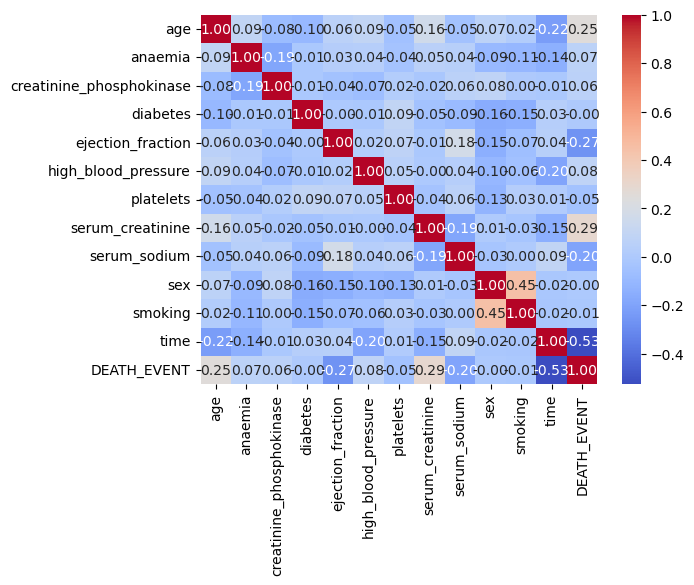

In [402]:
#looking at the correlation betwen all variables, getting an overview of what to pinpoint
correlation = df.corr()
sns.heatmap(correlation,cmap='coolwarm',annot=True, fmt = '.2f')

#there semms to be no specific pair that stands out. Most correlation are close to 0.

Text(0.5, 1.0, 'Number of People in Different Age Groups')

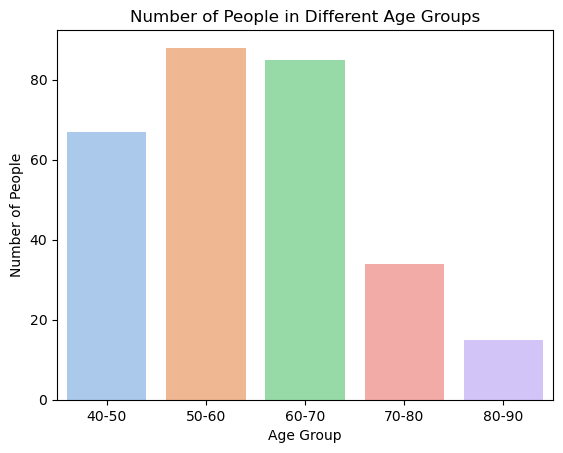

In [404]:
#see the age distribution
#group and count the age for better view
age_grouping = pd.cut(
df['age'],
     bins=[40, 50, 60, 70, 80, 90], 
    labels=['40-50', '50-60', '60-70','70-80','80-90'])
age_grouped_counts = df.groupby(age_grouping).size().reset_index(name='Count')

sns.barplot(x='age', y='Count', data=age_grouped_counts,palette='pastel')

# labeling
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.title('Number of People in Different Age Groups')


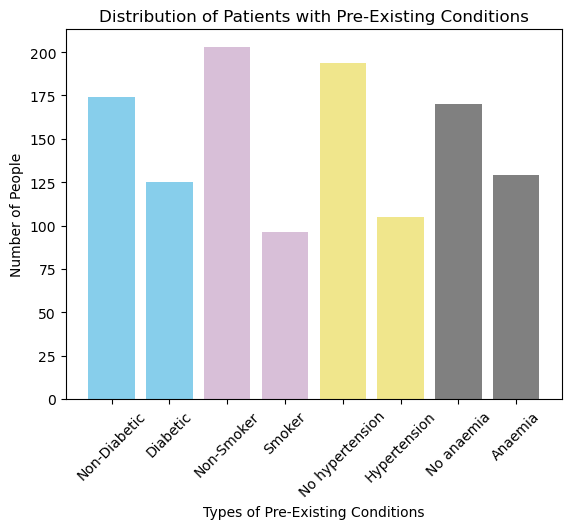

<Figure size 2000x1000 with 0 Axes>

In [392]:
#see number of people who has pre-existing conditions such as diabetes, smoking, hypertension, and anaemia
#count the number of people who smokes
diabetes_count = df.diabetes.value_counts()
smoking_count = df.smoking.value_counts()
htn_count = df.high_blood_pressure.value_counts()
anaemia_count = df.anaemia.value_counts()

# Plotting
fig, ax = plt.subplots()
plt.figure(figsize=(20,10))
ax.bar(['Non-Diabetic', 'Diabetic'], diabetes_count, label='Diabetes',color='skyblue')
ax.bar(['Non-Smoker', 'Smoker'], smoking_count, label='Smoking',color='thistle')
ax.bar(['No hypertension', 'Hypertension'], htn_count, label='Hypertension',color='khaki')
#HTN = hypertension here
ax.bar(['No anaemia', 'Anaemia'], anaemia_count, label='Anaemia',color='gray')

# Adding labels and title
ax.set_xlabel('Types of Pre-Existing Conditions')
ax.set_ylabel('Number of People')
ax.set_title('Distribution of Patients with Pre-Existing Conditions')
ax.tick_params(axis="x", rotation=45)

#The number of patients with pre-existing conditions are actually lower than patients without. 

### Step 3:  Identify 3 research questions and perform analysis & Step 4: Present your findings
OVERVIEW YOUR QUESTION AND PERFORM YOUR ANALYSIS IN THIS SECTION 
* Q1) What is the correlation between ejection fraction and outcome? Is the survival rate higher in those with better ejection fraction?
* Q2) Can the factors we know from the follow-up predict the survival outcome of the patient?
* Q3) Is there a relationship between time of follow-up and occurence of the death event. 

#### Q1) What is the correlation between ejection fraction and outcome? Is the survival rate higher in those with better ejection fraction?

array([[ 1.        , -0.26860331],
       [-0.26860331,  1.        ]])

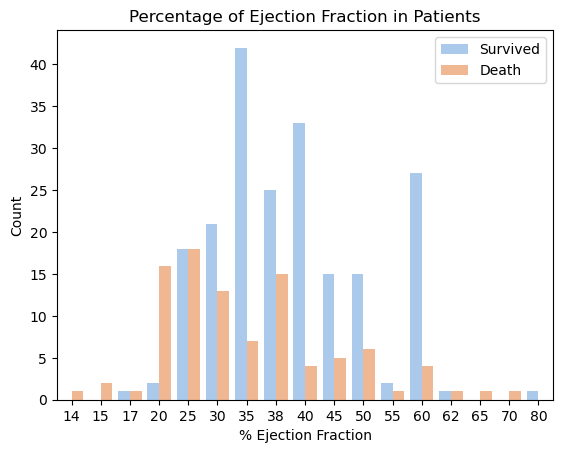

In [331]:
#see the ejection fraction in patients
sns.countplot(x='ejection_fraction', data=df,hue="DEATH_EVENT",palette='pastel').set(title="Percentage of Ejection Fraction in Patients")
# Adding labels and title
plt.xlabel('% Ejection Fraction')
plt.ylabel('Count')
plt.legend(labels=['Survived','Death'])

sns.scatterplot(data=df, x='ejection_fraction',  y='d'
np.corrcoef(df["ejection_fraction"], df["DEATH_EVENT"])

***Present Findings Q1***
This shows that most death events occur between 20% to 38% which is categorized as heart failure with reduced ejection fraction and systolic dysfunction. From the data, the death rate increases as the ejection fraction goes down. The pearson correlation coefficient is computed above. It seems to show that there is weak negative correlation between ejection fraction and a death event. This states that the decrease of ejection fraction possibly impacts the outcome.

#### Q2) Can the factors obtained from the follow-up predict the survival outcome of the patient?

In [414]:
#Create a model and test the accuracy to see if it the data can give an accurate prediction of outcome
# Set X, y
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

# Create the Random Forest
clf = RandomForestClassifier(random_state=0)
clf

RandomForestClassifier(random_state=0)

In [415]:
# Split and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Fit and predict data
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Check Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#See the feature importance, which factor impacted the outcome more?
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)

Accuracy: 0.8166666666666667


Text(0, 0.5, 'Features')

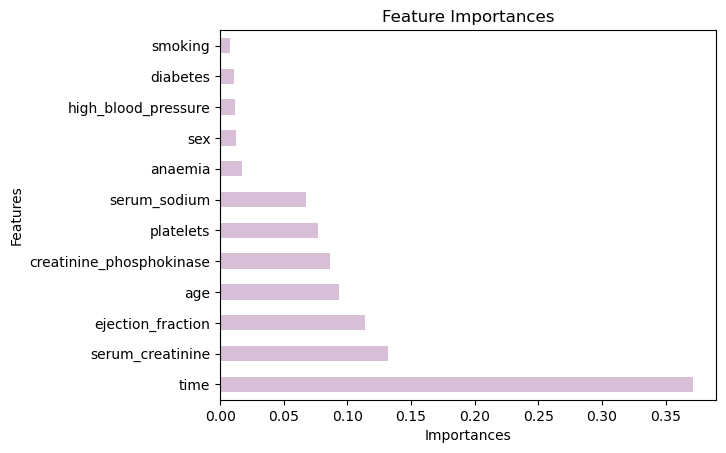

In [411]:
#plot the feature importance
feat_importances.nlargest(20).plot(kind='barh',color='thistle').set_title("Feature Importances")
plt.xlabel('Importances')
plt.ylabel('Features')

***Present Findings Q2*** The random forest classifier was used for this data as it can handle non-linearity, and feature importance that could be shown as a result, which could benefit patietns in the long-run to know which factots are impacted the most. From the heat map of correlation above, it is seen that there are no direct correlations between any of the variables within the dataset. Here it is seen that the accuracy of the model is 81.67%, which is not low. The top 3 features that impacted the data set is time or follow-up period, serum creatinine levels, and age. 

#### Q3) Time is playing one of the most important factors seemingly, I would like to explore if there is a relationship between time of follow-up and occurence of the death event.

Text(0.5, 1.0, 'Death Event Count Grouped by Time')

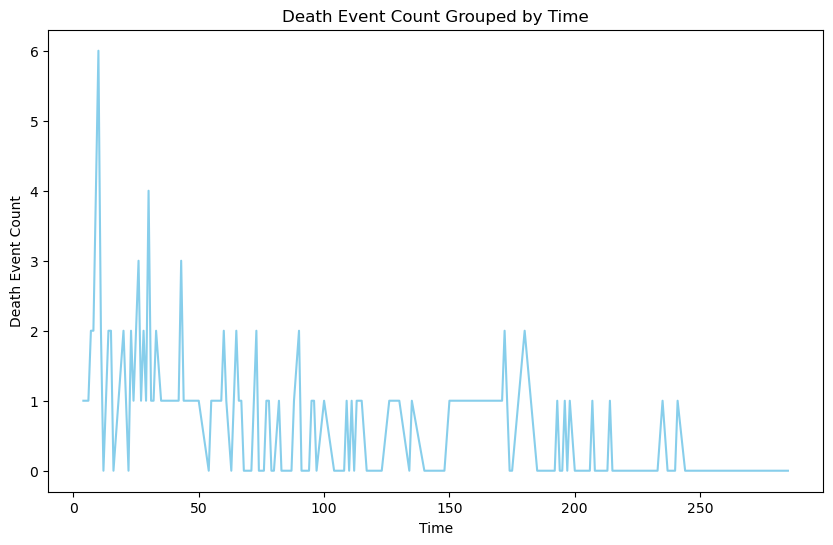

In [412]:
# counting the deaths per day
death_counts_by_time = df.groupby('time')['DEATH_EVENT'].sum().reset_index()
death_counts_by_time.columns = ['time', 'death_count']

#plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='death_count', data=death_counts_by_time, color='skyblue')
#label
plt.xlabel('Time')
plt.ylabel('Death Event Count')
plt.title('Death Event Count Grouped by Time')

***Present Findings Q3*** Based on the plot above, it is seen that most deaths occur within the to 10 days of the follow up peroid. The the number of deaths trends down towards the end and seems like it plateued at 0 after day 240. This could indicate that there is a "dangerous" period for patients after the initial episode of heart failure, and they stabilize after the first 10 days, but this statement can't be proven by this dataset exactly. 

**Limitations:** <br>
Typically heart failure is developed slolwy and is a chronic disease and is different from acute heart failure, which may present worst initially , but recover quickly. The way chronic heart failure is monitored differs from acute heart failure and may have been beneficial to identify which type of heart failure these patients have. If these patients had chronic heart failure, they must monitor their weight daily. It will be helpful if their weight trend were included as a part of the dataset as it indicates if their condition has worsen and would provide more insight into the eventual outcome. <br>
<br> The dataset is good for exploring relationships between provided factors and the occurrence of death events in heart failure patients, but has many uncertainties, but knowingly affects the survival outcome. Based on the dataset, the exact death cause can't be sure. Also, the setting the patients are in could highly impact the survival outcome as well. For example, if they resided at home alone versus if they had a caretaker, if they resided in a skilled nursing facility, or if they were in long-term care. The data also couldn't tell us if they were following the standards of care for heart failure patients after, if they patients were physically active afterwards, if they were adherent to medications and follow-up appointments, or there diabetes and hypertension were in good control. The dataset could potentially suffer from selection bias, as it represents a specific population of heart failure patients, but I am unsure how these patients were selected. These findings likley will not be able to be extrapolated into the general public. Due to the limitations and potential biases, this data and the model done in this project will likely not be applicable to the real world, but it could benefit the healthcare professionals to know which factors are more crucial to the outcome. I also have to assumem that all patients follow until the end of the project as that information was not provided. 